In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso

In [2]:
x = pd.read_csv('./data/x.csv')
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2.009000e+03,1.780000e+00,1.780000e+02,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,5.911656e+08,5.911656e+08,5.911656e+08,143.0,5.911656e+08,7.1,5.911656e+08
2,300000000.0,9.634204e+08,2.007000e+03,2.350000e+00,1.690000e+02,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2.015000e+03,2.350000e+00,1.480000e+02,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2.012000e+03,2.350000e+00,1.640000e+02,106759.0,2.500000e+08,8.5,4.481306e+08


In [3]:
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1) # quito esa columna de x

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [5]:
print(len(x))
print(len(x_train))

4104
2462


In [6]:
model = Lasso()
model.fit(x_train, y_train)  # Entrenamiento

predicted = model.predict(x_test)

/home/ruben/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [7]:
predicted.shape

(1642,)

Comparamos la prediccion con los datos de test

([array([1.526e+03, 9.500e+01, 1.800e+01, 0.000e+00, 2.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
  array([1.528e+03, 8.300e+01, 2.400e+01, 4.000e+00, 1.000e+00, 2.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])],
 array([-5.90445190e+07,  3.21176253e+08,  7.01397026e+08,  1.08161780e+09,
         1.46183857e+09,  1.84205934e+09,  2.22228012e+09,  2.60250089e+09,
         2.98272166e+09,  3.36294243e+09,  3.74316321e+09]),
 <a list of 2 Lists of Patches objects>)

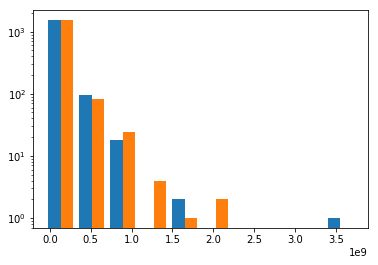

In [8]:
plt.hist([predicted, y_test], log=True)

### Evaluemos el comportamiento del modelo.

<div class="alert alert-block alert-info" style="margin-top: 20px">
  Los estimadores y las funciones de sklearn vienen con el máximo de argumentos con valores por defecto que suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En este caso particular la función <code>estimator.score</code> ya viene con una de las métricas de <code>sklearn.metrics</code>, que es la métrica <code>sklearn.metric.r2_score</code>
</div>

<div class="alert alert-success">
  El <strong>score R2</strong> de una regresión es una de las formas más comunes de entender su poder predictivo. Este <strong>mientras más cerca de 1 este, mejor es</strong>
</div>
<div class="alert alert-success">
Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malo, ya que esto indica que la regresión es peor que si simplemente eligieramos un valor fijo como predicción para todos los puntos, la media. 
</div>

In [10]:
model.score(x_test, y_test)

0.8414040161788353

Los residuales son las diferencias entre las predicciones y el valor real.

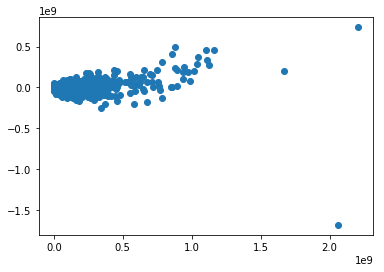

In [11]:
residuals = y_test - predicted
plt.scatter(y_test, residuals)

Veamos los errores en procentajes.

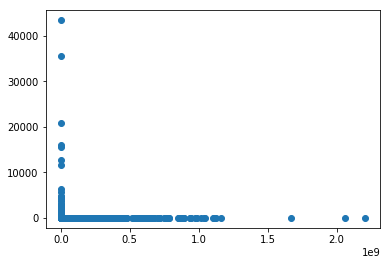

In [16]:
absolute_residuals =  np.abs(residuals) / y_test
plt.scatter(y_test, absolute_residuals)

En escala logaritmica:

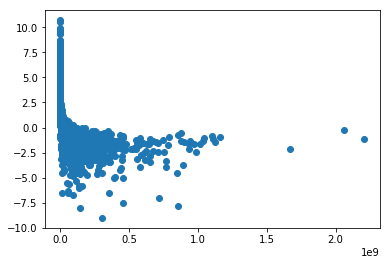

In [18]:
plt.scatter(y_test, np.log(absolute_residuals))

Realizamos ahora una evaluacion numerica de los errores, para lo cual usaremos la funcion acumulativa de la distribucion de los errores.

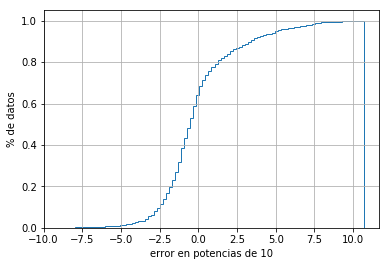

In [22]:
plt.hist(np.log(absolute_residuals), bins=100, normed=1, histtype='step', cumulative=True);
plt.ylabel('% de datos')
plt.xlabel('error en potencias de 10')
plt.grid(True)

Vemos que el 60% de los datos tienen un error menor al 100%